In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats
from scipy import stats
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.stattools import omni_normtest

from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.api import qqplot, add_constant

from sklearn.preprocessing import scale, minmax_scale, robust_scale
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from statsmodels.tools.eval_measures import rmse

%matplotlib inline
sns.set(font="AppleGothic")
plt.rcParams['axes.unicode_minus']=False

# 0. Îç∞Ïù¥ÌÑ∞ Î°úÎìú


In [78]:
df = pd.read_csv('·Ñé·Ö¶·Ñå·Öµ·ÜØ·ÑÄ·Ö•·Ü∑·Ñâ·Ö°.csv', engine='python', encoding='cp949')
df.head(n=3)

FAT  AGE  WEIGHT  HEIGHT  NECK  CHEST  ABDOMEN    HIP  THIGH  KNEE  ANKLE  \
0  35.2   46  363.15   72.25  51.2  136.2    148.1  147.7   87.3  49.1   29.6   
1  11.8   27  168.00   71.25  38.1   93.0     79.1   94.5   57.3  36.2   24.5   
2  22.2   69  177.75   68.50  38.7  102.0     95.0   98.3   55.0  38.3   21.8   

   BICEPS  FOREARM  WRIST  
0    45.0     29.0   21.4  
1    29.0     30.0   18.8  
2    30.8     25.7   18.8

# 1. Í≤ΩÌñ•ÏÑ± ÌôïÏù∏
## 1-1. ÏÇ∞Ï†êÎèÑ Î∂ÑÏÑù
### Ìï¥ÏÑù: 

- Ï¢ÖÏÜç Î≥ÄÏàò FATÍ≥º Î™∏Î¨¥Í≤å, Î™©ÎëòÎ†à, Í∞ÄÏä¥ÎëòÎ†à, Î≥µÎ∂ÄÎëòÎ†àÎäî ÏñëÏùò ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÎ•º Í∞ÄÏßÑÎã§.

    - Í∑∏ Ï§ë 1Í∞ú Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ÑÏ≤¥ ÏÇ∞Ï†êÎèÑÏóêÏÑú Î∂ÑÌè¨Í∞Ä Î≤óÏñ¥ÎÇòÏûàÍ∏∞ ÎïåÎ¨∏Ïóê, Ïù¥ÏÉÅÏπòÏùº Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÎã§.


- 'FAT'Í≥º ÏÑ†Ìòï Í¥ÄÍ≥ÑÍ∞Ä ÏûàÎäî Î≥ÄÏàòÎäî 'AGE'ÏôÄ 'HEIGHT'Î•º Ï†úÏô∏Ìïú Î™®Îì† Î≥ÄÏàòÏù¥Îã§.

    <'FAT'Í≥º ÏÑ†Ìòï Í¥ÄÍ≥ÑÍ∞Ä ÏûàÎäî Î≥ÄÏàò>
    
     'WEIGHT',
     'NECK',
     'CHEST',
     'ABDOMEN',
     'HIP',
     'THIGH',
     'KNEE',
     'ANKLE',
     'BICEPS',
     'FOREARM',
     'WRIST'

- Í∑∏Îü¨ÎÇò ÏÑ§Î™Ö Î≥ÄÏàòÎì§Í∞Ñ ÏÑ†ÌòïÏÑ±Ïù¥ ÏûàÎã§. Îî∞ÎùºÏÑú Îã§Ï§ë Í≥µÏÑ†ÏÑ±ÏùÑ ÌôïÏù∏Ìï¥ÏïºÌï† ÌïÑÏöîÏÑ±Ïù¥ ÏûàÎã§.

- ÏÑ§Î™Ö Î≥ÄÏàòÎì§Ïùò Î∂ÑÌè¨Í∞Ä Ï†ïÍ∑úÎ∂ÑÌè¨Ïóê Í∑ºÏÇ¨ÌïòÎäî Î∂ÑÌè¨Î•º Î≥¥Ïù∏Îã§.

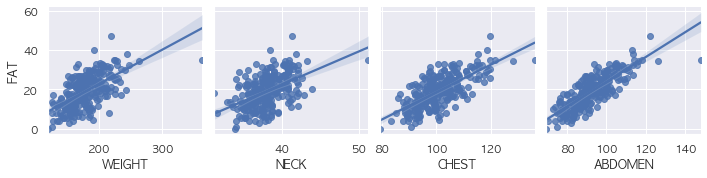

In [7]:
sns.pairplot(df, y_vars='Y', x_vars=['WEIGHT','NECK','CHEST','ABDOMEN'], kind='reg', diag_kind=None)

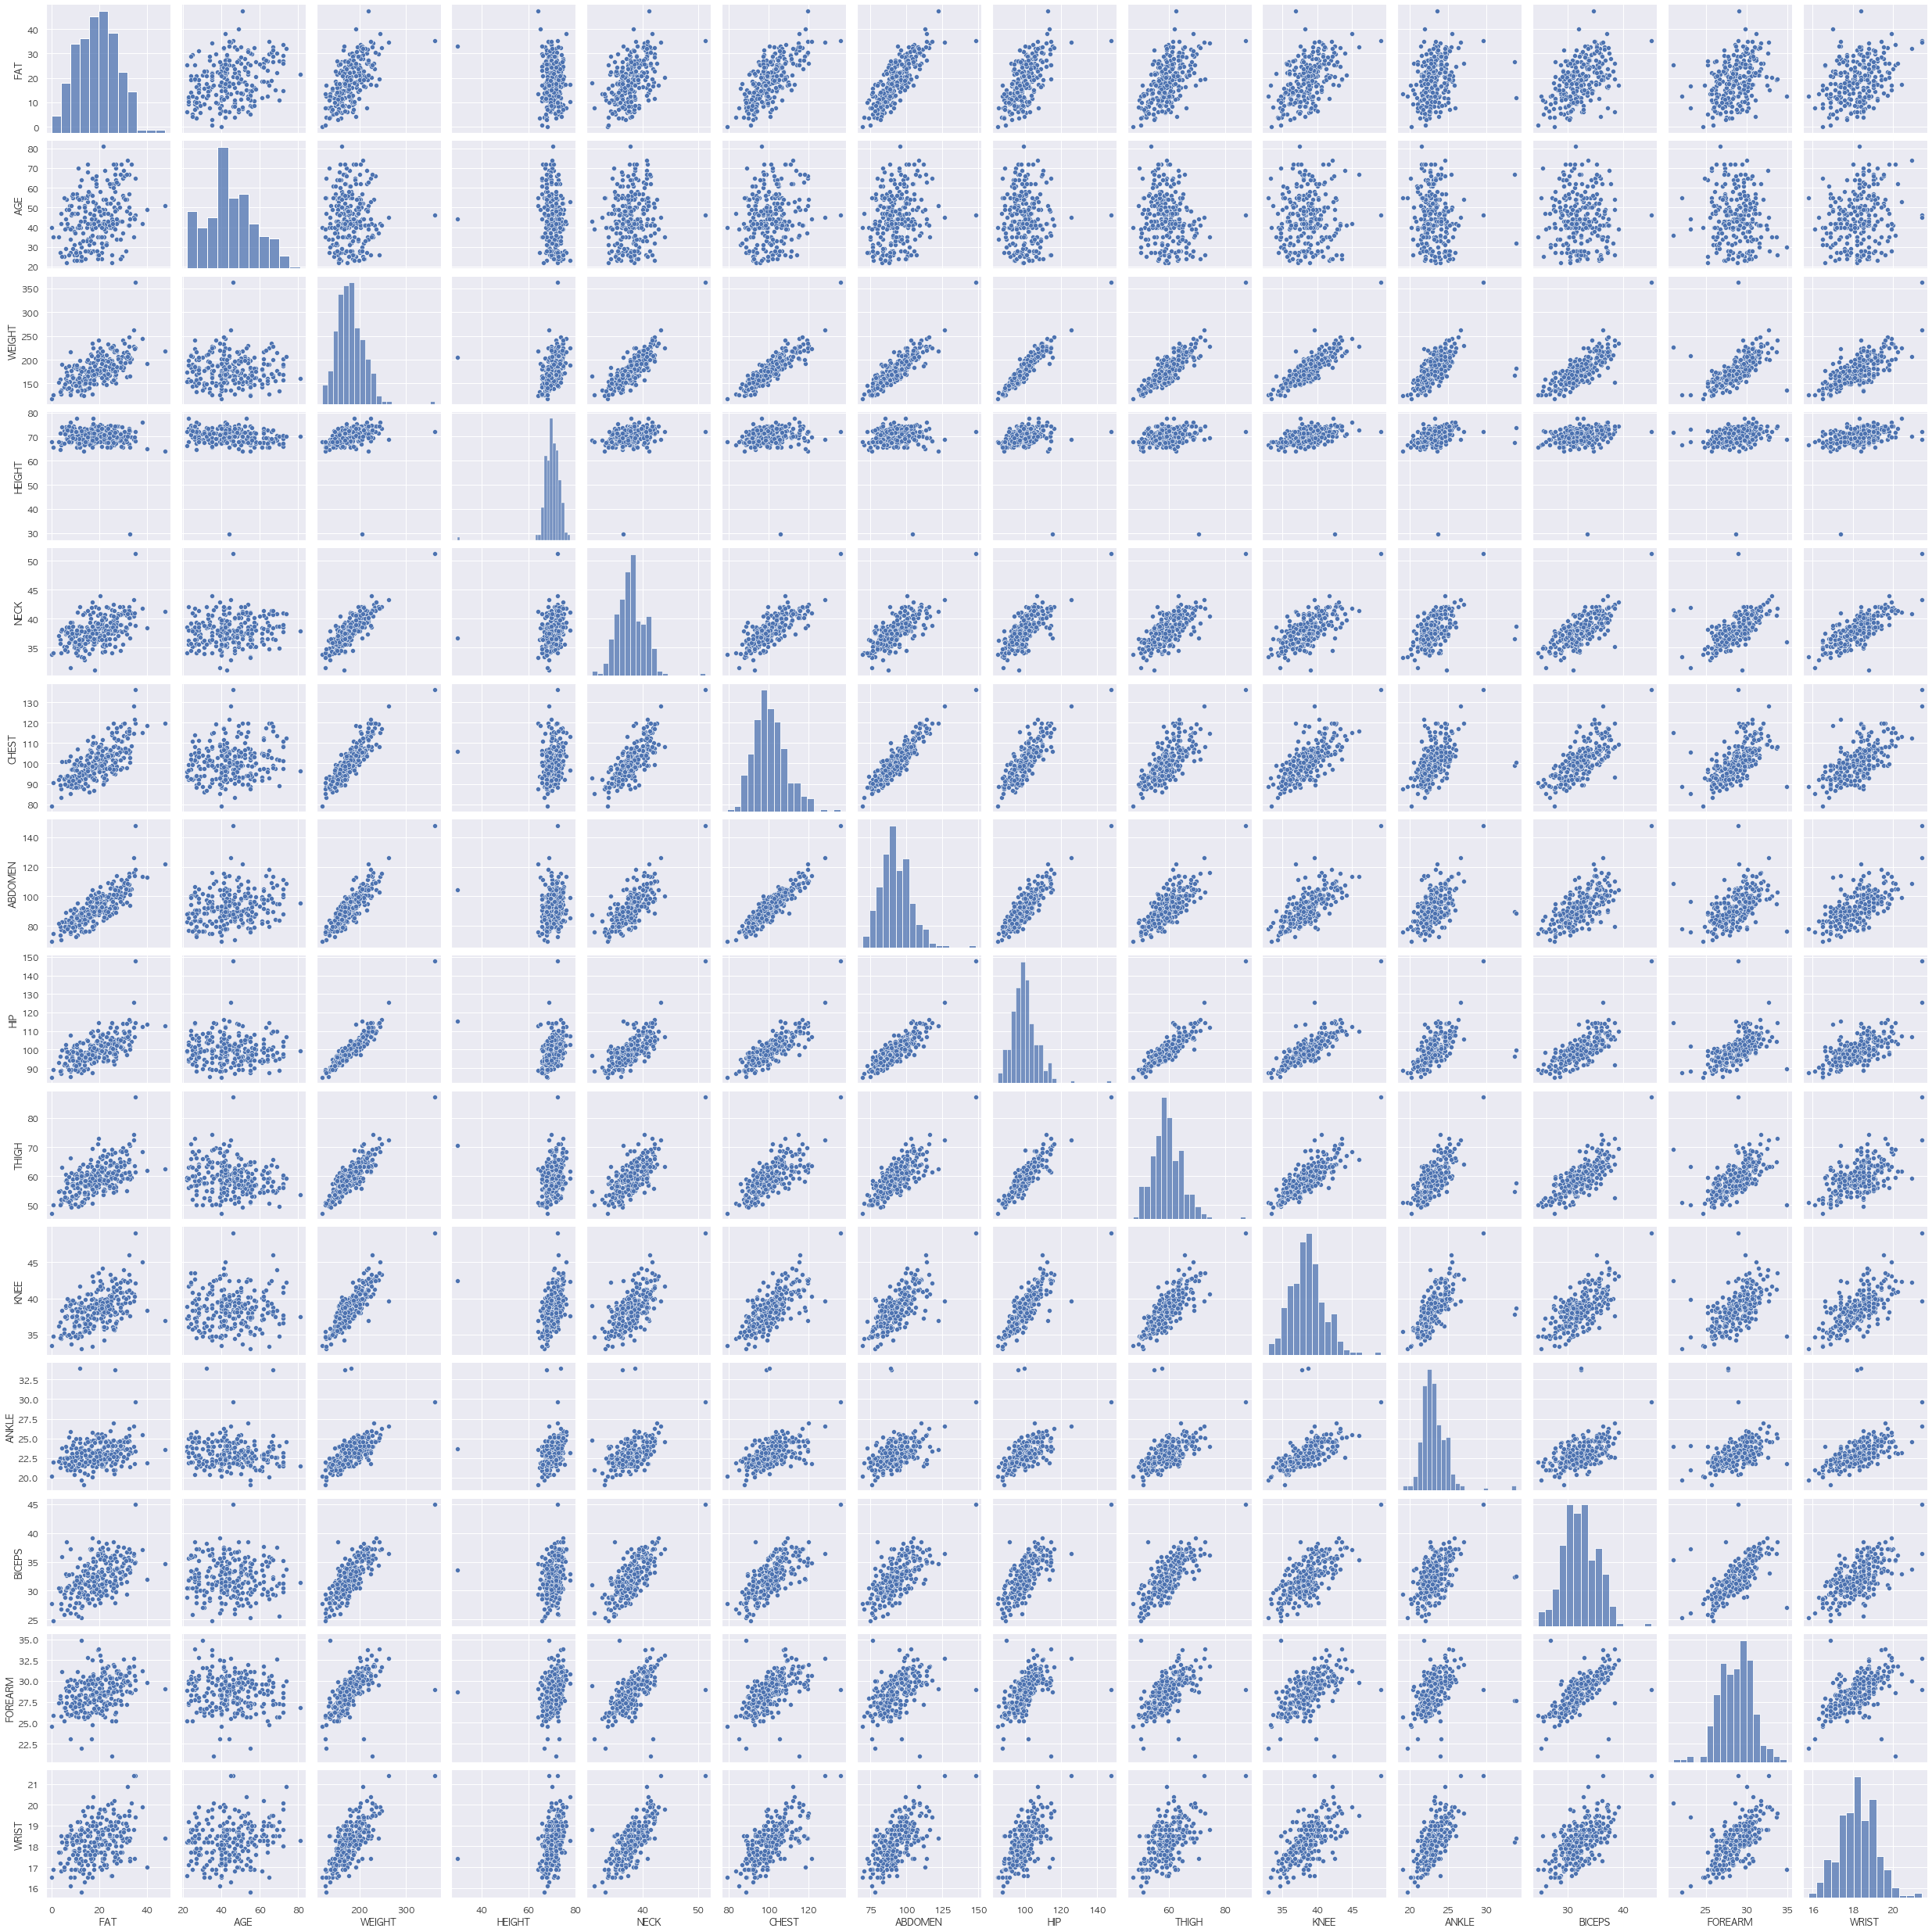

In [59]:
sns.pairplot(df)

## 1-2. ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
### Ìï¥ÏÑù: 

FATÍ≥º ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÄÎäî Î≥ÄÏàòÎì§ÏùÑ ÏÉÅÍ¥ÄÎèÑÍ∞Ä ÎÜíÏùÄ ÏàúÏÑúÎ°ú Ï†ïÎ¶¨ÌïòÎ©¥ Îã§ÏùåÍ≥º Í∞ôÎã§.
ABDOMEN>CHEST>HIP>WEIGHT>THIGH>KNEE>BICEPS>NECK>FOREARM>WRIST>AGE>ANKLE

ÌäπÌûà FATÍ≥º CHESTÏôÄ HIPÏùÄ ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÌÅ¨Îã§.

In [31]:
df.corr()

FAT       AGE    WEIGHT    HEIGHT      NECK     CHEST   ABDOMEN  \
FAT      1.000000  0.291458  0.612414 -0.089495  0.490592  0.702620  0.813432   
AGE      0.291458  1.000000 -0.012746 -0.171645  0.113505  0.176450  0.230409   
WEIGHT   0.612414 -0.012746  1.000000  0.308279  0.830716  0.894191  0.887995   
HEIGHT  -0.089495 -0.171645  0.308279  1.000000  0.253710  0.134892  0.087813   
NECK     0.490592  0.113505  0.830716  0.253710  1.000000  0.784835  0.754077   
CHEST    0.702620  0.176450  0.894191  0.134892  0.784835  1.000000  0.915828   
ABDOMEN  0.813432  0.230409  0.887995  0.087813  0.754077  0.915828  1.000000   
HIP      0.625201 -0.050332  0.940884  0.170394  0.734958  0.829420  0.874066   
THIGH    0.559608 -0.200096  0.868694  0.148436  0.695697  0.729859  0.766624   
KNEE     0.508665  0.017516  0.853167  0.286053  0.672405  0.719496  0.737179   
ANKLE    0.265970 -0.105058  0.613685  0.264744  0.477892  0.482988  0.453223   
BICEPS   0.493271 -0.041162  0.800416  0.207816  0.731146  0.727907  0.684983   
FOREARM  0.361387 -0.085056  0.630301  0.228649  0.623660  0.580173  0.503316   
WRIST    0.346575  0.213531  0.729775  0.322065  0.744826  0.660162  0.619832   

              HIP     THIGH      KNEE     ANKLE    BICEPS   FOREARM     WRIST  
FAT      0.625201  0.559608  0.508665  0.265970  0.493271  0.361387  0.346575  
AGE     -0.050332 -0.200096  0.017516 -0.105058 -0.041162 -0.085056  0.213531  
WEIGHT   0.940884  0.868694  0.853167  0.613685  0.800416  0.630301  0.729775  
HEIGHT   0.170394  0.148436  0.286053  0.264744  0.207816  0.228649  0.322065  
NECK     0.734958  0.695697  0.672405  0.477892  0.731146  0.623660  0.744826  
CHEST    0.829420  0.729859  0.719496  0.482988  0.727907  0.580173  0.660162  
ABDOMEN  0.874066  0.766624  0.737179  0.453223  0.684983  0.503316  0.619832  
HIP      1.000000  0.896410  0.823473  0.558387  0.739273  0.545014  0.630090  
THIGH    0.896410  1.000000  0.799170  0.539797  0.761477  0.566842  0.558685  
KNEE     0.823473  0.799170  1.000000  0.611608  0.678709  0.555898  0.664507  
ANKLE    0.558387  0.539797  0.611608  1.000000  0.484855  0.419050  0.566195  
BICEPS   0.739273  0.761477  0.678709  0.484855  1.000000  0.678255  0.632126  
FOREARM  0.545014  0.566842  0.555898  0.419050  0.678255  1.000000  0.585588  
WRIST    0.630090  0.558685  0.664507  0.566195  0.632126  0.585588  1.000000

In [66]:
# FATÍ≥º ÏÑ†Ìòï Í¥ÄÍ≥ÑÎ•º Í∞ÄÏßÄÎäî Î≥ÄÏàòÎì§ÏùÑ ÏÉÅÍ¥ÄÏÑ±Ïù¥ ÎÜíÏùÄ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨ÌïòÍ∏∞.
vs = df.corr().loc['FAT':'FAT'].values.tolist()[0]
cols = df.corr().loc['FAT':'FAT'].columns.tolist()

l = []
for idx, (c, v) in enumerate(zip(cols,vs)):
    l.append([c, v])
    
for x in sorted(l, key=lambda x: x[1], reverse=True):
    print(x[0], x[1])

FAT 1.0
ABDOMEN 0.8134322847810488
CHEST 0.702620338893864
HIP 0.625200917508663
WEIGHT 0.6124140022026471
THIGH 0.5596075319940899
KNEE 0.5086652428854678
BICEPS 0.49327112589161565
NECK 0.49059185344104006
FOREARM 0.36138690319971917
WRIST 0.34657486452658604
AGE 0.2914584401352219
ANKLE 0.26596977030637337
HEIGHT -0.08949537985440179


# 2.Î™®Îç∏ Ï†ÅÌï©ÏÑ± ÌôïÏù∏

# 2-0.ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ±: BMI
![image.png](attachment:image.png)

Text(0.5, 0, 'count')

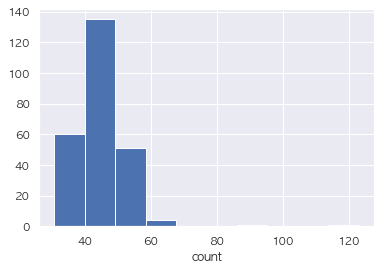

In [80]:
# df['WEIGHT']*0.45 #[kg]
# df['HEIGHT']*2.54*0.01 #[m]
df['BMI'] = df['WEIGHT']*0.45/(df['HEIGHT']*2.54*0.01) # Îã®ÏúÑ [kg/m**2]
plt.hist(df['BMI'])
plt.xlabel('BMI')
plt.xlabel('count')

In [81]:
df

FAT  AGE  WEIGHT  HEIGHT  NECK  CHEST  ABDOMEN    HIP  THIGH  KNEE  \
0    35.2   46  363.15   72.25  51.2  136.2    148.1  147.7   87.3  49.1   
1    11.8   27  168.00   71.25  38.1   93.0     79.1   94.5   57.3  36.2   
2    22.2   69  177.75   68.50  38.7  102.0     95.0   98.3   55.0  38.3   
3    10.6   57  147.75   65.75  35.2   99.6     86.4   90.1   53.0  35.0   
4    47.5   51  219.00   64.00  41.2  119.8    122.1  112.8   62.5  36.9   
..    ...  ...     ...     ...   ...    ...      ...    ...    ...   ...   
247  31.9   74  207.50   70.00  40.8  112.4    108.5  107.1   59.3  42.2   
248  23.6   43  170.75   67.50  37.4  103.7     89.7   94.2   58.5  39.0   
249  20.9   35  162.75   66.00  36.4   99.1     92.8   99.2   63.1  38.7   
250  17.0   56  167.75   68.50  37.4   98.6     93.0   97.0   55.4  38.8   
251  17.7   42  168.00   71.50  36.5   92.0     89.7  101.0   62.3  38.0   

     ANKLE  BICEPS  FOREARM  WRIST        BMI  
0     29.6    45.0     29.0   21.4  89.048579  
1     24.5    29.0     30.0   18.8  41.773726  
2     21.8    30.8     25.7   18.8  45.972470  
3     21.3    31.7     27.3   16.9  39.811682  
4     23.6    34.7     29.1   18.4  60.623770  
..     ...     ...      ...    ...        ...  
247   24.6    33.7     30.0   20.9  52.516873  
248   24.1    33.8     28.8   18.8  44.816273  
249   21.7    31.1     26.4   16.9  43.687366  
250   23.2    32.4     29.7   19.0  43.386114  
251   22.3    30.8     27.8   16.9  41.627664  

[252 rows x 15 columns]

# 2-1.Î™®Îç∏ Ï†ÅÌï©ÏÑ± ÌôïÏù∏
### Ìï¥ÏÑù:
- Î∂ÑÏÇ∞ Î∂ÑÏÑù Í≤∞Í≥º: F ÌÜµÍ≥ÑÎüâ Í∞íÏù¥ Îß§Ïö∞ ÌÅ¨Í≥†, p-valueÍ∞Ä 0Ïù¥ÎØÄÎ°ú H0Í∏∞Í∞Å=> Îã§Ï§ëÌöåÍ∑Ä Î™®Îç∏Î°úÏÑú Ïú†ÏùòÏàòÏ§Ä 5%ÏóêÏÑú Ïú†ÏùòÌïòÎã§.
    - F-statistic:                     50.61
    - Prob (F-statistic):           5.07e-63
- R-squared: Î™®Îç∏Î°ú FAT Î≥ÄÏàòÎ•º 74.9% ÏÑ§Î™ÖÌï† Ïàò ÏûàÎã§.
- ÌöåÍ∑ÄÍ≥ÑÏàò Í≤ÄÏ†ï Í≤∞Í≥º:
    - Ïó¨Îü¨ ÌöåÍ∑Ä Í≥ÑÏàò Ï§ëÏóê p-valueÍ∞Ä 0.05Î≥¥Îã§ ÏûëÏùÄ Î≥ÄÏàòÎäî Î≥µÎ∂Ä(0.000), ÌåîÎöù(0.026), ÏÜêÎ™©(0.003)ÏúºÎ°ú FAT ÏÑ§Î™ÖÎ≥ÄÏàòÎ°úÏÑú Ïú†ÏùòÌïòÎã§.

In [93]:
model = smf.ols(formula='FAT ~ AGE+WEIGHT+HEIGHT+NECK+CHEST+ABDOMEN+HIP+THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST+BMI', data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     50.61
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           5.07e-63
Time:                        23:12:35   Log-Likelihood:                -718.10
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     237   BIC:                             1519.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -29.2532     27.035     -1.082      0.2

# Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÌôïÏù∏

Í∞ÄÏä¥, Î≥µÎ∂Ä, ÌÇ§, ÏóâÎç©Ïù¥, BMI, Î™∏Î¨¥Í≤åÏùò VIF Í∞íÏù¥ 10ÏùÑ ÎÑòÎäîÎã§.=> Îã§Ï§ë Í≥µÏÑ†ÏÑ±ÏùÑ Í∞ÄÏßÑÎã§.

Îã§Ï§ë Í≥µÏÑ†ÏÑ±Ïù¥ Í∞ÄÏû• ÎÜíÏùÄ Î≥ÄÏàòÎäî Î™∏Î¨¥Í≤åÏù¥Îã§.


In [92]:
x=df.drop('FAT', axis=1)
x_const = add_constant(x)
df_vif = pd.DataFrame()
df_vif['variable'] = x_const.columns
df_vif['VIF']=[variance_inflation_factor(x_const.values, i) for i in range(x_const.shape[1])]
df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)

variable       VIF
10    ANKLE     1.920
12  FOREARM     2.199
1       AGE     2.252
13    WRIST     3.378
11   BICEPS     3.674
4      NECK     4.457
9      KNEE     4.797
8     THIGH     8.003
5     CHEST    10.066
6   ABDOMEN    12.570
3    HEIGHT    13.604
7       HIP    14.859
14      BMI    29.905
2    WEIGHT    94.865
0     const  9907.028

# Îã§Ï§ë Í≥µÏÑ†ÏÑ± ÎÜíÏùÄ Î≥ÄÏàò Ï†úÍ±∞ ÌõÑ Ïû¨ÌôïÏù∏
Îã§Ï§ë Í≥µÏÑ†ÏÑ± ÎÜíÏùÄ Î≥ÄÏàòÎäî BMIÏßÄÏàò, Î≥µÎ∂Ä, ÏóâÎç©Ïù¥Î°ú 3Í∞úÎ°ú Í∞êÏÜåÌïòÏòÄÏúºÎ©∞, 

Îã§Î•∏ Î≥ÄÏàòÎì§Ïùò Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïù¥ Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Í∞êÏÜåÌïòÏòÄÎã§.

üìåÌäπÌûà BMI ÏßÄÏàòÎäî Ïó¨Ï†ÑÌûà Îã§Ï§ë Í≥µÏÇ∞ÏÑ±Ïù¥ 10Ïù¥ÏÉÅÏúºÎ°ú ÎÜíÏùÄÎç∞, Ïù¥Îäî Îã§Î•∏ Î≥ÄÏàòÎì§Ïùò Ï°∞Ìï©ÏúºÎ°ú Ïù¥Î£®Ïñ¥ÏßÑ Î≥ÄÏàòÏù¥Í∏∞ ÎïåÎ¨∏Ïùº Í≤ÉÏúºÎ°ú Ìï¥ÏÑùÎêúÎã§.

In [91]:
x=df.drop(['FAT', 'WEIGHT'], axis=1)
x_const = add_constant(x)
df_vif = pd.DataFrame()
df_vif['variable'] = x_const.columns
df_vif['VIF']=[variance_inflation_factor(x_const.values, i) for i in range(x_const.shape[1])]
df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)

variable      VIF
9     ANKLE    1.863
11  FOREARM    2.196
1       AGE    2.227
12    WRIST    3.349
10   BICEPS    3.524
2    HEIGHT    3.828
3      NECK    4.030
8      KNEE    4.797
7     THIGH    7.777
4     CHEST    8.183
13      BMI   10.563
5   ABDOMEN   11.286
6       HIP   12.794
0     const  795.150

# Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïù¥ ÎÜíÏùÄ Î≥ÄÏàòÎ•º Ï†úÍ±∞Ìïú ÌõÑ Îã§Ïãú Îã§Ï§ë ÏÑ†Ìòï ÌöåÍ∑Ä Ï†ÅÌï© Ïã§Ìóò
### Ìï¥ÏÑù: Î≥ÄÏàò Ï†úÍ±∞ ÌõÑ Î≥ÄÌôîÎäî?

- Î∂ÑÏÇ∞ Î∂ÑÏÑù Í≤∞Í≥º: F ÌÜµÍ≥ÑÎüâ Í∞íÏù¥ Îß§Ïö∞ ÌÅ¨Í≥†, p-valueÍ∞Ä 0Ïù¥ÎØÄÎ°ú H0Í∏∞Í∞Å=> Îã§Ï§ëÌöåÍ∑Ä Î™®Îç∏Î°úÏÑú Ïú†ÏùòÏàòÏ§Ä 5%ÏóêÏÑú Ïó¨Ï†ÑÌûà Ïú†ÏùòÌïòÎã§.
    - F-statistic:                     54.13
    - Prob (F-statistic):           1.79e-63
    
- R-squared: Î™®Îç∏Î°ú FAT Î≥ÄÏàò ÏÑ§Î™ÖÌïòÎäî ÏÑ§Î™ÖÎ†•Ïù¥ 74.9%-> 74.7%Î°ú ÏÜåÎüâ Í∞êÏÜå
    - Îã§Ï§ë Í≥µÏÑ†ÏÑ±Ïù¥ ÌÅ∞ Î≥ÄÏàòÎ•º Ï†úÍ±∞ÌïòÏòÄÏúºÎØÄÎ°ú ÏÑ§Î™ÖÎ†•Ïù¥ ÏÜåÎüâ Í∞êÏÜåÌïòÏòÄÎã§.
    - Ïù¥Î•º ÌÜµÌï¥ Ï†úÍ±∞Ìïú Î≥ÄÏàòÏùò Ï¢ÖÏÜçÎ≥ÄÏàò ÏÑ§Î™ÖÎ†•Ïù¥ Î∂àÌïÑÏöî ÌñàÎã§Í≥† Ìï¥ÏÑùÌïòÏòÄÎã§.
    
- ÌöåÍ∑ÄÍ≥ÑÏàò Í≤ÄÏ†ï Í≤∞Í≥º:
    - Î≥ÄÏàò Ï†úÍ±∞ Ï†Ñ FAT ÏÑ§Î™ÖÎ≥ÄÏàòÎ°úÏÑú Ïú†ÏùòÌñàÎçò "Î≥µÎ∂Ä(0.000->0.000), ÌåîÎöù(0.023), ÏÜêÎ™©(0.002)"Ïùò p-valueÍ∞Ä Îçî Í∞êÏÜåÌñàÎã§=> Îçî Ïú†ÏùòÌï¥Ï°åÎã§.
    - Î≥ÄÏàò Ï†úÍ±∞ ÌõÑ p-valueÍ∞Ä 0.05Î≥¥Îã§ ÏûëÏùÄ Î≥ÄÏàòÍ∞Ä "ÎÇòÏù¥, Î™©"ÏúºÎ°ú Ï∂îÍ∞ÄÎêòÏóàÎã§.
    
- üìåBMI ÏßÄÏàòÎäî p-valueÍ∞Ä 0.315ÏúºÎ°ú 0.05Î≥¥Îã§ ÌÅ¨ÎØÄÎ°ú H0Ï±ÑÌÉù => Ïú†ÏùòÌïòÏßÄ ÏïäÎã§.

In [94]:
model = smf.ols(formula='FAT ~ AGE+HEIGHT+NECK+CHEST+ABDOMEN+HIP+THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST+BMI', data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     54.13
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           1.79e-63
Time:                        23:13:17   Log-Likelihood:                -719.15
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     238   BIC:                             1516.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3098      7.675      0.952      0.3

# ÌõÑÏßÑÏ†úÍ±∞Î≤ïÏùÑ ÌÜµÌïú Î≥ÄÏàò ÏÑ†ÌÉù
### Ìï¥ÏÑù: ÏÑ†ÌÉùÎêú Î≥ÄÏàòÏôÄ Ï†úÍ±∞Îêú Î≥ÄÏàòÎäî?

ÏïûÏÑú Î™®Îç∏ ÌîºÌåÖ Í≤∞Í≥ºÏóêÏÑú ÏÉÅÍ¥Ä Í≥ÑÏàòÎ°úÏÑú Î≥ÄÏàòÏùò p-valueÎ•º ÏÇ¥Ìé¥Î≥¥ÏïòÏùÑ Îïå Ïú†ÏùòÌñàÎçò Î≥ÄÏàòÏù∏ Î≥µÎ∂Ä, ÌåîÎöù, ÏÜêÎ™©Ïù¥ ÏÑ†ÌÉùÎêòÏñ¥ÏûàÎã§.

Î∞òÎ©¥ Ï∂îÍ∞ÄÎ°ú Ïú†ÏùòÌïú Î≥ÄÏàòÏóê Îì§ÏóàÎçò, ÎÇòÏù¥Îäî Ï†úÍ±∞ÎêòÏóàÎã§.

üìåBMI ÏßÄÏàòÎäî Ïú†ÏùòÌïòÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏Ïóê ÏòàÏÉÅÎåÄÎ°ú Ï†úÍ±∞ÎêòÏóàÎã§.

In [96]:
y = df['FAT']
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=5).fit(x,y)
selected_x = x.columns[rfe.support_]
removed_x = x.columns[~rfe.support_]
print('ÏÑ†ÌÉù Î≥ÄÏàò', selected_x)
print('Ï†úÍ±∞ Î≥ÄÏàò',removed_x)

ÏÑ†ÌÉù Î≥ÄÏàò Index(['NECK', 'ABDOMEN', 'HIP', 'FOREARM', 'WRIST'], dtype='object')
Ï†úÍ±∞ Î≥ÄÏàò Index(['AGE', 'WEIGHT', 'HEIGHT', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS',
       'BMI'],
      dtype='object')


# ÌõÑÏßÑÏ†úÍ±∞Î≤ï Ïù¥ÌõÑ Î™®Îç∏ ÌîºÌåÖ Í≤∞Í≥º
### Ìï¥ÏÑù: Î≥ÄÏàò Ï†úÍ±∞ ÌõÑ Î≥ÄÌôîÎäî?

- Î∂ÑÏÇ∞ Î∂ÑÏÑù Í≤∞Í≥º: F ÌÜµÍ≥ÑÎüâ Í∞íÏù¥ Îß§Ïö∞ Ï¶ùÍ∞Ä, p-valueÍ∞Ä 0ÏúºÎ°ú Îçî ÏàòÎ†¥ÌïòÏòÄÎã§=> H0Í∏∞Í∞Å=> Îã§Ï§ëÌöåÍ∑Ä Î™®Îç∏Î°úÏÑú Ïú†ÏùòÏàòÏ§Ä 5%ÏóêÏÑú Ïó¨Ï†ÑÌûà Ïú†ÏùòÌïòÎã§.
    - F-statistic:                     133.8
    - Prob (F-statistic):           4.38e-68
    
- R-squared: Î™®Îç∏Î°ú FAT Î≥ÄÏàò ÏÑ§Î™ÖÌïòÎäî ÏÑ§Î™ÖÎ†•Ïù¥ 74.7%->73.1%Î°ú Í∞êÏÜå
    - Ïó¨Îü¨ Î≥ÄÏàòÎ•º Ï†úÍ±∞ÌïòÏòÄÏúºÎØÄÎ°ú ÏÑ§Î™ÖÎ†•Ïù¥ Í∞êÏÜåÌïòÏòÄÎã§.
    - ÌïòÏßÄÎßå Í∞êÏÜåÏùò Ï†ïÎèÑÎäî 1%Ï†ïÎèÑÎ°ú, Ï†úÍ±∞Ìïú 9Í∞ú Î≥ÄÏàòÏùò ÏÑ§Î™ÖÎ†•Ïù¥ ÌÅ¨ÏßÄ ÏïäÏïòÎçò Í≤ÉÏúºÎ°ú Ìï¥ÏÑùÎêúÎã§.
    
- ÌöåÍ∑ÄÍ≥ÑÏàò Í≤ÄÏ†ï Í≤∞Í≥º:
    - "Î™©, Î≥µÎ∂Ä, ÏóâÎç©Ïù¥, ÌåîÎöù, ÏÜêÎ™©"Ïùò p-valueÍ∞Ä Îçî Í∞êÏÜåÌñàÎã§=> Îçî Ïú†ÏùòÌï¥Ï°åÎã§.

In [97]:
model = smf.ols(formula='FAT ~ NECK+ABDOMEN+HIP+FOREARM+WRIST', data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           4.38e-68
Time:                        23:36:30   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

# 3.ÌöåÍ∑ÄÍ≥ÑÏàò Í≥ÑÏÇ∞ Î∞è ÌôïÏù∏
ÎπÑÎßåÎèÑÎäî {ÏÜêÎ™© ÎëêÍªò, ÏóâÎç©Ïù¥ÎëòÎ†à,Î™© ÎëòÎ†à}Í∞Ä ÏñáÏùÑÏàòÎ°ù, {Î≥µÎ∂Ä ÎëòÎ†à, ÌåîÎöù ÎëòÎ†à}Í∞Ä Ï¶ùÍ∞ÄÌï†ÏàòÎ°ù ÎÜíÎã§. 

In [ ]:
FAT = 2.7037 + (-0.6012)*Î™© + 0.9743*Î≥µÎ∂Ä+ (-0.3316)*ÏóâÎç©Ïù¥ +(0.4095)*ÌåîÎöù + (-1.6180)*ÏÜêÎ™©

# 4.ÏûîÏ∞® Î∂ÑÏÑù
### ÏûîÏ∞®Ïùò Îì±Î∂ÑÏÇ∞ÏÑ± Í≤ÄÏ†ï
Ìï¥ÏÑù:
ÏûîÏ∞®Îì§Ïù¥ 0ÏùÑ Ï§ëÏã¨ÏúºÎ°ú Í∞ÅÍ∞Å **y = 0ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÎûúÎç§ÌïòÍ≤å Î∂ÑÌè¨**ÌïúÎã§.=>Îì±Î∂ÑÏÇ∞ÏÑ± ÎßåÏ°±

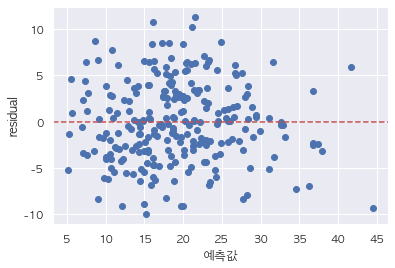

In [98]:
plt.scatter(result.fittedvalues, result.resid)
plt.xlabel('ÏòàÏ∏°Í∞í')
plt.ylabel('residual')
plt.axhline(y=0, linestyle = '--', c='r')
plt.show()
plt.close()

### ÏûîÏ∞®Ïùò ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ï
Durbin-wawtson(ÎèÖÎ¶ΩÏÑ±) Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ 2.128Î°ú 2Ïóê Í∞ÄÍπåÏö∞ÎØÄÎ°ú =>ÎèÖÎ¶ΩÏÑ±ÏùÑ ÎßåÏ°±ÌïúÎã§.

### ÏûîÏ∞®Ïùò Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï
- Prob(Omnibus): p-value = 0.158ÏúºÎ°ú Ïú†ÏùòÏàòÏ§Ä 5%ÏóêÏÑú Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉùÌïúÎã§.=>Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•∏Îã§


# 5. Î™®Îç∏ ÏÑ†Ï†ï

# ÌëúÏ§ÄÌôî ÌöåÍ∑Ä Í≥ÑÏàòÎ•º Ïù¥Ïö©Ìïú Î≥ÄÏàò Ï§ëÏöîÎèÑ ÌôïÏù∏
ÌöåÍ∑Ä Î™®Îç∏ÏóêÏÑú Ï§ëÏöîÎèÑÍ∞Ä Í∞ÄÏû• ÌÅ∞ Í≤ÉÏùÄ Î≥µÎ∂Ä ÎëòÎ†àÏù¥Îã§.

<AxesSubplot:>

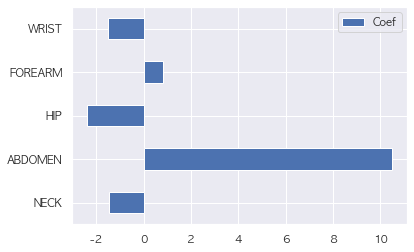

In [113]:
# ÏÑ§Î™Ö Î≥ÄÏàò ÌëúÏ§ÄÌôî
scaler = StandardScaler()
cols = x.columns

# ÏÑ§Î™Ö Î≥ÄÏàòÏùò scale Î≥ÄÌôò
np_scaled = scaler.fit_transform(x)
df_scaled = pd.DataFrame(np_scaled, columns=cols)

df_scaled['FAT'] = df['FAT']

model_scaled = smf.ols(formula='FAT ~ NECK+ABDOMEN+HIP+FOREARM+WRIST', data=df_scaled)
result_scaled = model_scaled.fit()

coef = pd.DataFrame({'Coef': result_scaled.params.values[1:]}, index = selected_x)
coef.plot.barh(y='Coef', legend=True)